In [ ]:
# In this script we compare the distances from the Digital version against some computed from sampling

In [10]:
import os
import numpy as np
from shape_reader import ShapeReader
import math
import ect_tools
import itertools
from itertools import combinations
import pandas as pd
from numpy import genfromtxt
fails=0 # Number of failed readings
# Loop for reading in the Cross terms
res=np.zeros([116,116])
for i in range(1,117):
    dimmu=str(i)
    for j in range(1,117):
        jimmu=str(j)
        filename='500ECT/results/'+dimmu+'/'+jimmu+'.npy'
        try:
            res[i-1,j-1]=np.load(filename)
        except:
            res[i-1,j-1]=0
            print(filename)
            fails=fails+1

D_ECT=np.zeros([116,116])
for i in range(116):
    for j in range(116):
        cross=res[i,i]+res[j,j]-2*res[i,j] # Don't store negative values
        D_ECT[i,j]=max(0,cross)

500ECT/results/4/25.npy
500ECT/results/4/94.npy
500ECT/results/6/70.npy
500ECT/results/25/4.npy
500ECT/results/32/32.npy
500ECT/results/38/111.npy
500ECT/results/44/44.npy
500ECT/results/56/56.npy
500ECT/results/57/57.npy
500ECT/results/65/91.npy
500ECT/results/70/6.npy
500ECT/results/79/79.npy
500ECT/results/84/84.npy
500ECT/results/84/112.npy
500ECT/results/89/92.npy
500ECT/results/91/65.npy
500ECT/results/92/89.npy
500ECT/results/94/4.npy
500ECT/results/104/104.npy
500ECT/results/111/38.npy
500ECT/results/112/84.npy
500ECT/results/113/113.npy


In [11]:
# Doing the discrete version (Bad script but hey)
df1 = pd.read_csv('500ECT/ECT.csv') # Need this to have the same order as the above
n_h=10 # How many heights
dirs = genfromtxt('directions326.csv', delimiter=',') # Just use the 300+ directions
ndir=dirs.shape[0]
heights=np.linspace(-1,1,n_h)
lista=df1.iloc[:,1].values
matrices=list()
for k in range(len(lista)):
    meshname=os.path.join('0.5kv_meshes/',lista[k])
    s1=ShapeReader.shape_from_file(meshname)
    s1.V=s1.V-np.mean(s1.V,0)
    scales=[sum(tmp**2)**(0.5) for tmp in s1.V]
    s1.V=s1.V/max(scales)
    s1.prepare()
    s1.prepare_for_MC()
    matrix=np.zeros([n_h,ndir])
    print(k)
    for i in range(n_h):
        threshold=heights[i]
        for j in range(ndir):
            direction=dirs[j]
            matrix[i,j]=s1.compute_MC_ECT(direction,threshold)
    matrices.append(matrix)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115


In [12]:
MC_distances=np.zeros([116,116])
for i in range(116):
    for j in range(i):
        MC_distances[i,j]=(np.sum((matrices[i]-matrices[j])**2))**0.5
        MC_distances[j,i]=(np.sum((matrices[i]-matrices[j])**2))**0.5

In [15]:
# Let's compare some
D_ECT_c=D_ECT/np.max(D_ECT)
MC_distances_c=MC_distances/np.max(MC_distances)
import matplotlib.pyplot as plt

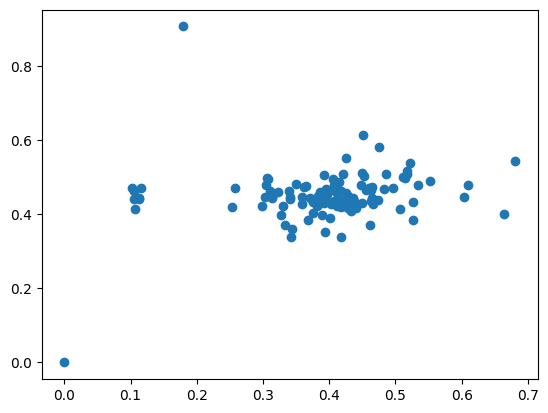

In [21]:
t=np.random.randint(116)
plt.scatter(D_ECT_c[t,:],MC_distances_c[t,:])
# Plot the distance from a random mesh to all the others
# If everything was good, we would expect strong correlation

In [38]:
# Generate random rotation
alpha=np.random.rand()*2*math.pi
beta=np.random.rand()*2*math.pi
gamma=np.random.rand()*2*math.pi
M1=ect_tools.M([1,0,0],alpha)
M2=ect_tools.M([0,1,0],beta)
M3=ect_tools.M([0,0,1],gamma)
M=np.matmul(np.matmul(M1,M2),M3)

In [46]:
# Another comparison: Discrete vs discrete
# Doing the discrete version (Bad script but hey)
df1 = pd.read_csv('500ECT/ECT.csv') # Need this to have the same order as the above
n_h=10 # How many heights
dirs = genfromtxt('directions326.csv', delimiter=',') # Just use the 300+ directions
dirs=np.matmul(dirs,M)
ndir=dirs.shape[0]
heights=np.linspace(-1,1,n_h)
lista=df1.iloc[:,1].values
matrices2=list()
for k in range(len(lista)):
    meshname=os.path.join('0.5kv_meshes/',lista[k])
    s1=ShapeReader.shape_from_file(meshname)
    s1.V=s1.V-np.mean(s1.V,0)
    scales=[sum(tmp**2)**(0.5) for tmp in s1.V]
    s1.V=s1.V/max(scales)
    s1.prepare()
    s1.prepare_for_MC()
    matrix=np.zeros([n_h,ndir])
    print(k)
    for i in range(n_h):
        threshold=heights[i]
        for j in range(ndir):
            direction=dirs[j]
            matrix[i,j]=s1.compute_MC_ECT(direction,threshold)
    matrices2.append(matrix)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115


In [48]:
MC_distances2=np.zeros([116,116])
for i in range(116):
    for j in range(i):
        MC_distances2[i,j]=(np.sum((matrices2[i]-matrices2[j])**2))**0.5
        MC_distances2[j,i]=(np.sum((matrices2[i]-matrices2[j])**2))**0.5
MC_distances2_c=MC_distances2/np.max(MC_distances2)

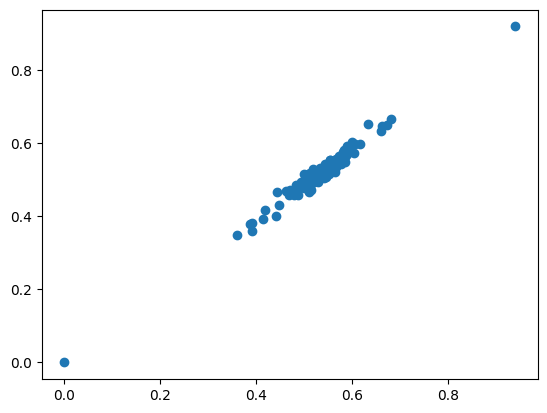

In [54]:
# Discrete against discrete
t=np.random.randint(116)
plt.scatter(MC_distances2_c[t,:],MC_distances_c[t,:])

/media/iso/conda/envs/november/lib/python3.9/site-packages/sklearn/manifold/_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


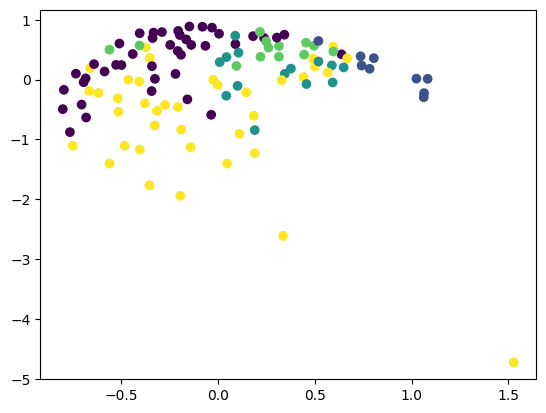

In [60]:
# Now some clustering without MSTS based on the discrete one:
labels=genfromtxt('labels_tmp')
from sklearn.manifold import MDS
mds = MDS(random_state=0)
X_transform = mds.fit_transform(MC_distances2_c)
plt.scatter(X_transform[:,0],X_transform[:,1],c=labels)

/media/iso/conda/envs/november/lib/python3.9/site-packages/sklearn/manifold/_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


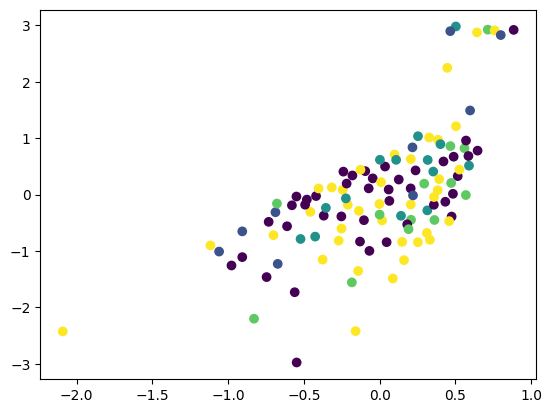

In [58]:
labels=genfromtxt('labels_tmp')
from sklearn.manifold import MDS
mds = MDS(random_state=0)
X_transform = mds.fit_transform(D_ECT_c)
plt.scatter(X_transform[:,0],X_transform[:,1],c=labels)